- Nama : Masahiro Gerarudo Yamazaki
- Email	  : 	masahiroymzk24@gmail.com


# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [291]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import time
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import SMOTE
from IPython.display import display
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [292]:
df = pd.read_csv('/content/Dataset_inisiasi.csv')
df.head(6)

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,Cluster,TransactionType,Channel,CustomerOccupation
0,14.09,70.0,81.0,5112.21,2,Debit,ATM,Doctor
1,376.24,68.0,141.0,13758.91,2,Debit,ATM,Doctor
2,126.29,19.0,56.0,1122.35,1,Debit,Online,Student
3,184.50,26.0,25.0,8569.06,1,Debit,Online,Student
4,13.45,26.0,198.0,7429.40,4,Credit,Online,Student
5,92.15,18.0,172.0,781.68,2,Debit,ATM,Student


In [293]:
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2399 non-null   float64
 1   CustomerAge          2399 non-null   float64
 2   TransactionDuration  2399 non-null   float64
 3   AccountBalance       2399 non-null   float64
 4   Cluster              2399 non-null   int64  
 5   TransactionType      2399 non-null   object 
 6   Channel              2399 non-null   object 
 7   CustomerOccupation   2399 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 150.1+ KB


In [294]:
# Cek missing values
print("\nMissing values per fitur:")
print(df.isnull().sum())


Missing values per fitur:
TransactionAmount      0
CustomerAge            0
TransactionDuration    0
AccountBalance         0
Cluster                0
TransactionType        0
Channel                0
CustomerOccupation     0
dtype: int64


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [295]:
# Splitting data
X = df.drop("Cluster", axis=1)
y = df["Cluster"]

In [296]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Encoding untuk fitur kategorikal
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [297]:
# Menentukan kolom numerik & kategorikal berdasarkan X
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Buat instance MinMaxScaler untuk normalisasi kolom numerik
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split data menjadi set pelatihan dan set uji (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1919, 7), y_train=(1919,)
Test set shape: X_test=(480, 7), y_test=(480,)


In [298]:
X_train.shape, X_test.shape, y_train.value_counts(), y_test.value_counts()

((1919, 7),
 (480, 7),
 Cluster
 2    576
 0    474
 1    432
 3    194
 4    186
 5     57
 Name: count, dtype: int64,
 Cluster
 2    144
 0    118
 1    108
 3     49
 4     47
 5     14
 Name: count, dtype: int64)

In [299]:
# ======== Terapkan SMOTE untuk menyeimbangkan kelas di data latih ========
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Menampilkan distribusi kelas setelah SMOTE
print("Distribusi kelas setelah SMOTE:", y_train_resampled.value_counts())

Distribusi kelas setelah SMOTE: Cluster
0    576
3    576
2    576
1    576
5    576
4    576
Name: count, dtype: int64


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [300]:
# ======== Bangun dan Latih Model ========
# Menggunakan model Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Prediksi pada data uji
y_pred = rf.predict(X_test)

# Evaluasi hasil
print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='macro'):.4f}")

Akurasi: 1.0000
F1-Score: 1.0000


In [301]:
# ======= Latih dengan Logistic Regression =======
lr = LogisticRegression(random_state=42)
lr.fit(X_train_resampled, y_train_resampled)

# Prediksi pada data uji
y_pred_lr = lr.predict(X_test)

# Evaluasi Logistic Regression
print(f"Akurasi Logistic Regression: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score Logistic Regression: {f1_score(y_test, y_pred_lr, average='macro'):.4f}")

Akurasi Logistic Regression: 1.0000
F1-Score Logistic Regression: 1.0000


In [302]:
# # Bagian 1: Pelatihan Model
# rf = RandomForestClassifier().fit(X_train, y_train)  # Random Forest
# lr = LogisticRegression().fit(X_train, y_train)  # Logistic Regression

# print("Model training selesai.")

### Random Forest

**Random Forest** adalah algoritma **ensemble learning** yang terdiri dari sekumpulan pohon keputusan (decision trees) yang bekerja secara bersama-sama untuk menghasilkan prediksi yang lebih akurat. Setiap pohon keputusan dibangun dengan cara memilih subset acak dari data latih dan fitur yang ada, kemudian hasil prediksi dari setiap pohon digabungkan menggunakan voting (untuk klasifikasi) atau rata-rata (untuk regresi). Hal ini membuat Random Forest lebih robust dan mampu mengatasi overfitting yang biasa terjadi pada pohon keputusan tunggal.

### Logistic Regression

**Logistic Regression** adalah algoritma klasifikasi yang digunakan untuk memprediksi probabilitas dari dua kelas (binary classification) dengan menggunakan fungsi logistik (sigmoid). Model ini membangun hubungan linier antara fitur input (X) dan hasil output (y), dan hasil prediksi akhirnya diubah menjadi probabilitas antara 0 dan 1. Dengan menggunakan threshold (biasanya 0.5), model ini mengklasifikasikan output ke dalam dua kelas yang berbeda.

### Alasan Memilih Kedua Algoritma

1. **Random Forest**: Dikenal karena kemampuannya untuk menangani dataset dengan banyak fitur dan hubungan yang kompleks. Dataset ini mungkin memiliki interaksi yang kompleks antara fitur numerik dan kategorikal, sehingga Random Forest cocok karena dapat menangani berbagai jenis data tanpa memerlukan asumsi linearitas.

2. **Logistic Regression**: Dipilih karena kesederhanaannya dan interpretabilitasnya. Jika hubungan antara fitur dan target relatif linier, Logistic Regression dapat memberikan hasil yang baik dan mudah untuk dipahami. Ini juga digunakan sebagai baseline model untuk membandingkan dengan model yang lebih kompleks.

### Kaitannya dengan Dataset

Dataset yang digunakan memiliki fitur numerik dan kategorikal. **Random Forest** cocok untuk dataset seperti ini karena dapat menangani fitur numerik dan kategorikal secara bersamaan, sementara **Logistic Regression** memerlukan pengolahan fitur kategorikal melalui encoding sebelum dapat digunakan.


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [303]:
# ======== Random Forest ========
# Melakukan prediksi pada data uji
rf_y_pred = rf.predict(X_test)

# Menghitung metrik evaluasi
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred, average='macro')  # gunakan 'macro' jika multiclass
rf_precision = precision_score(y_test, rf_y_pred, average='macro')
rf_recall = recall_score(y_test, rf_y_pred, average='macro')

# Menampilkan hasil evaluasi
print("=== Evaluasi Random Forest ===")
print(f"Akurasi      : {rf_accuracy:.4f}")
print(f"F1-Score     : {rf_f1:.4f}")
print(f"Precision    : {rf_precision:.4f}")
print(f"Recall       : {rf_recall:.4f}")


=== Evaluasi Random Forest ===
Akurasi      : 1.0000
F1-Score     : 1.0000
Precision    : 1.0000
Recall       : 1.0000


In [304]:
# ======== Logistic Regression ========
# Melakukan prediksi pada data uji
lr_y_pred = lr.predict(X_test)

# Menghitung metrik evaluasi
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_f1 = f1_score(y_test, lr_y_pred, average='macro')
lr_precision = precision_score(y_test, lr_y_pred, average='macro')
lr_recall = recall_score(y_test, lr_y_pred, average='macro')

# Menampilkan hasil evaluasi
print("=== Evaluasi Logistic Regression ===")
print(f"Akurasi      : {lr_accuracy:.4f}")
print(f"F1-Score     : {lr_f1:.4f}")
print(f"Precision    : {lr_precision:.4f}")
print(f"Recall       : {lr_recall:.4f}")

=== Evaluasi Logistic Regression ===
Akurasi      : 1.0000
F1-Score     : 1.0000
Precision    : 1.0000
Recall       : 1.0000


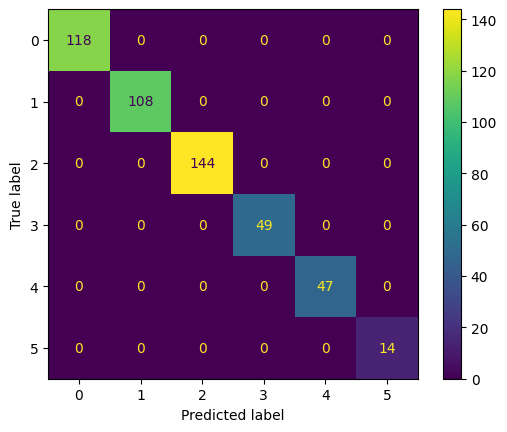

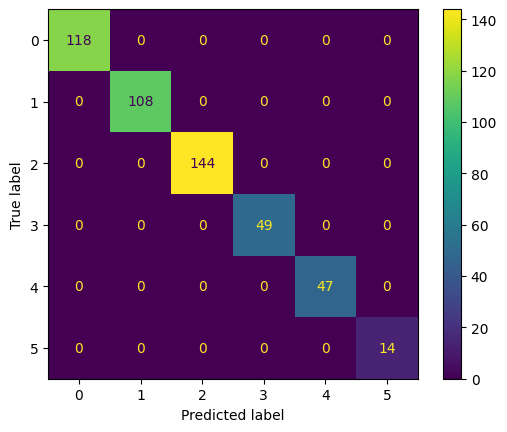

In [305]:
# ======== Random Forest ========
# Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_y_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()

# ======== Logistic Regression ========
# Confusion Matrix
cm_lr = confusion_matrix(y_test, lr_y_pred)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()

In [306]:
# Membuat DataFrame untuk menampilkan perbandingan evaluasi kedua model
evaluation_data = {
    "Model": ["Random Forest", "Logistic Regression"],
    "Accuracy": [rf_accuracy, lr_accuracy],
    "F1-Score": [rf_f1, lr_f1],
    "Precision": [rf_precision, lr_precision],
    "Recall": [rf_recall, lr_recall]
}


evaluation_df = pd.DataFrame(evaluation_data)
evaluation_df

,Model,Accuracy,F1-Score,Precision,Recall
0,Random Forest,1.0,1.0,1.0,1.0
1,Logistic Regression,1.0,1.0,1.0,1.0


### **Confusion Matrix**

Pada kedua model **Random Forest** dan **Logistic Regression**, kita dapat melihat bahwa diagonal utama (dari kiri atas ke kanan bawah) berisi nilai yang bukan nol, yang berarti semua prediksi dilakukan dengan benar. Diagonal utama ini menunjukkan bahwa model berhasil mengklasifikasikan semua kelas dengan sempurna, tanpa ada kesalahan klasifikasi. Tidak ada nilai yang muncul di luar diagonal utama, menandakan bahwa kedua model tidak melakukan kesalahan dalam klasifikasi kelas-kelas tersebut.

### **Analisis Model**

Kedua model, **Random Forest** dan **Logistic Regression**, menunjukkan performa yang sangat baik dengan **Akurasi** dan **F1-Score** 100%. Hal ini berarti bahwa kedua model dapat memprediksi semua data uji dengan benar, tanpa ada kesalahan prediksi.

### **Kesimpulan**

1. **Akurasi 100%**:
   - Akurasi yang sangat tinggi ini menunjukkan bahwa model mungkin mengalami **overfitting**. Terutama pada **Logistic Regression**, yang biasanya tidak mencapai performa sempurna pada dataset nyata. Hal ini menunjukkan bahwa data uji mungkin memiliki pola yang sangat mirip dengan data latih, sehingga model bisa "mengingat" data tersebut dengan sempurna.

2. **Performa ini Tidak Realistis**:
   - Meskipun hasil ini sangat baik pada data uji, ini mungkin tidak realistis di dunia nyata. Model harus diuji dengan data yang benar-benar baru, yang belum pernah dilihat sebelumnya, agar bisa benar-benar mengukur kemampuan generalisasi model.

3. **Untuk Menghindari Overfitting**:
   - Tahap selanjutnya adalah melakukan beberapa langkah untuk mencegah overfitting, seperti:
     - **Pengurangan Fitur** atau **regularisasi pada Logistic Regression**.
     - **Penyesuaian Hyperparameter pada Random Forest**, misalnya mengurangi kedalaman pohon atau melakukan pengaturan lain yang dapat meningkatkan generalisasi model.
     

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [307]:
# ======== Tuning Random Forest ========
rf = RandomForestClassifier(random_state=42)

# Mencatat waktu mulai eksekusi
start_time = time.time()

# Definisikan parameter grid untuk Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],  # Jumlah pohon dalam hutan
    'max_depth': [3, 5, 7, 9],         # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],   # Jumlah sampel minimum untuk membagi simpul
    'min_samples_leaf': [1, 2, 4],     # Jumlah sampel minimum di daun pohon
    'bootstrap': [True, False]         # Apakah menggunakan bootstrap sampling
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Melakukan pencarian grid
grid_search.fit(X_train, y_train)

# Output hasil terbaik
print(f"Best parameters (Grid Search): {grid_search.best_params_}")
best_rf_grid = grid_search.best_estimator_

# Evaluasi performa model setelah Grid Search
y_pred_grid = best_rf_grid.predict(X_test)

# Menghitung MSE (Mean Squared Error)
grid_search_mse = mean_squared_error(y_test, y_pred_grid)
print(f"MSE after Grid Search: {grid_search_mse:.2f}")

# Mencatat waktu selesai
end_time = time.time()

# Menghitung waktu eksekusi
execution_time = end_time - start_time
print(f"Waktu eksekusi: {execution_time:.4f} detik")

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters (Grid Search): {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MSE after Grid Search: 0.00
Waktu eksekusi: 187.2777 detik


In [308]:
# ======== Tuning Logistic Regression ========
lr = LogisticRegression(random_state=42)

# Mencatat waktu mulai eksekusi
start_time = time.time()

# Definisikan parameter grid untuk Grid Search
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],                # Regularisasi
    'solver': ['liblinear', 'saga'],        # Algoritma optimasi
    'max_iter': [100, 200, 300]             # Jumlah iterasi maksimal
}

# Inisialisasi GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=3, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)

# Output hasil terbaik
print(f"Best parameters (Grid Search - Logistic Regression): {grid_search_lr.best_params_}")
best_lr_grid = grid_search_lr.best_estimator_

# Evaluasi performa model setelah Grid Search
y_pred_lr_grid = best_lr_grid.predict(X_test)
grid_search_lr_mse = mean_squared_error(y_test, y_pred_lr_grid)
print(f"MSE after Grid Search (Logistic Regression): {grid_search_lr_mse:.2f}")

# Mencatat waktu selesai
end_time = time.time()

# Menghitung waktu eksekusi
execution_time = end_time - start_time
print(f"Waktu eksekusi: {execution_time:.4f} detik")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters (Grid Search - Logistic Regression): {'C': 1, 'max_iter': 100, 'solver': 'saga'}
MSE after Grid Search (Logistic Regression): 0.00
Waktu eksekusi: 1.1510 detik


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [309]:
# ======== Evaluasi Random Forest dengan Hyperparameter Terbaik ========
# Gunakan model dengan hyperparameter terbaik dari GridSearchCV
best_rf_model = grid_search.best_estimator_

# Melakukan prediksi dengan model yang sudah dituning
rf_y_pred_tuned = best_rf_model.predict(X_test)

# Menghitung metrik evaluasi untuk Random Forest setelah tuning
rf_accuracy_tuned = accuracy_score(y_test, rf_y_pred_tuned)
rf_f1_tuned = f1_score(y_test, rf_y_pred_tuned, average='macro')  # F1-score rata-rata
rf_precision_tuned = precision_score(y_test, rf_y_pred_tuned, average='macro')
rf_recall_tuned = recall_score(y_test, rf_y_pred_tuned, average='macro')

# Menghitung MSE (Mean Squared Error)
rf_mse_tuned = mean_squared_error(y_test, rf_y_pred_tuned)

# Menampilkan hasil evaluasi setelah tuning
print("=== Evaluasi Random Forest Setelah Tuning ===")
print(f"Akurasi      : {rf_accuracy_tuned:.4f}")
print(f"F1-Score     : {rf_f1_tuned:.4f}")
print(f"Precision    : {rf_precision_tuned:.4f}")
print(f"Recall       : {rf_recall_tuned:.4f}")
print(f"MSE          : {rf_mse_tuned:.2f}")

=== Evaluasi Random Forest Setelah Tuning ===
Akurasi      : 1.0000
F1-Score     : 1.0000
Precision    : 1.0000
Recall       : 1.0000
MSE          : 0.00


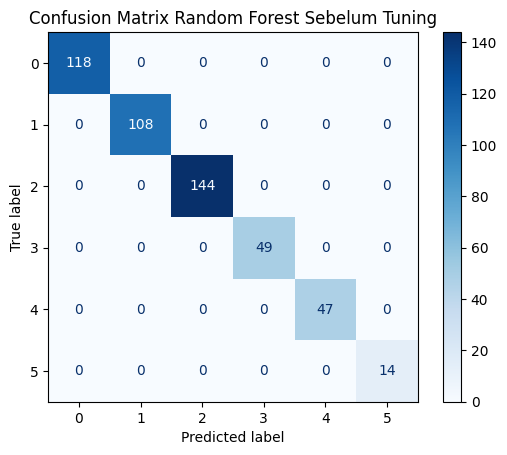

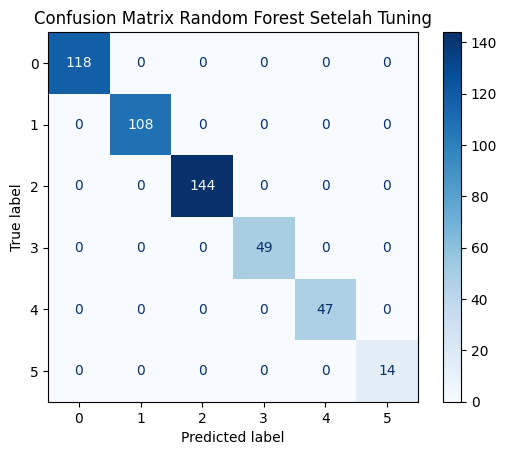

In [310]:
# ======== Evaluasi Random Forest Sebelum Tuning ========
# Latih model Random Forest default
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Prediksi sebelum tuning
rf_y_pred_before = rf.predict(X_test)

# Menghitung confusion matrix sebelum tuning
rf_cm_before = confusion_matrix(y_test, rf_y_pred_before)
disp_rf_before = ConfusionMatrixDisplay(confusion_matrix=rf_cm_before, display_labels=rf.classes_)

# Menampilkan confusion matrix sebelum tuning dengan judul
disp_rf_before.plot(cmap='Blues')
plt.title('Confusion Matrix Random Forest Sebelum Tuning')  # Menambahkan judul
plt.show()

# ======== Evaluasi Random Forest Setelah Tuning ========
# Prediksi setelah tuning menggunakan model terbaik dari GridSearchCV
rf_y_pred_after_tuning = best_rf_grid.predict(X_test)

# Menghitung confusion matrix setelah tuning
rf_cm_after = confusion_matrix(y_test, rf_y_pred_after_tuning)
disp_rf_after = ConfusionMatrixDisplay(confusion_matrix=rf_cm_after, display_labels=rf.classes_)

# Menampilkan confusion matrix setelah tuning dengan judul
disp_rf_after.plot(cmap='Blues')
plt.title('Confusion Matrix Random Forest Setelah Tuning')  # Menambahkan judul
plt.show()

In [311]:
# ======== Evaluasi Logistic Regression dengan Hyperparameter Terbaik ========
# Gunakan model dengan hyperparameter terbaik dari GridSearchCV
best_lr_model = grid_search_lr.best_estimator_

# Melakukan prediksi dengan model yang sudah dituning
lr_y_pred_tuned = best_lr_model.predict(X_test)

# Menghitung metrik evaluasi untuk Logistic Regression setelah tuning
lr_accuracy_tuned = accuracy_score(y_test, lr_y_pred_tuned)
lr_f1_tuned = f1_score(y_test, lr_y_pred_tuned, average='macro')
lr_precision_tuned = precision_score(y_test, lr_y_pred_tuned, average='macro')
lr_recall_tuned = recall_score(y_test, lr_y_pred_tuned, average='macro')

# Menghitung MSE (Mean Squared Error)
lr_mse_tuned = mean_squared_error(y_test, lr_y_pred_tuned)

# Menampilkan hasil evaluasi setelah tuning
print("=== Evaluasi Logistic Regression Setelah Tuning ===")
print(f"Akurasi      : {lr_accuracy_tuned:.4f}")
print(f"F1-Score     : {lr_f1_tuned:.4f}")
print(f"Precision    : {lr_precision_tuned:.4f}")
print(f"Recall       : {lr_recall_tuned:.4f}")
print(f"MSE          : {lr_mse_tuned:.2f}")

=== Evaluasi Logistic Regression Setelah Tuning ===
Akurasi      : 1.0000
F1-Score     : 1.0000
Precision    : 1.0000
Recall       : 1.0000
MSE          : 0.00


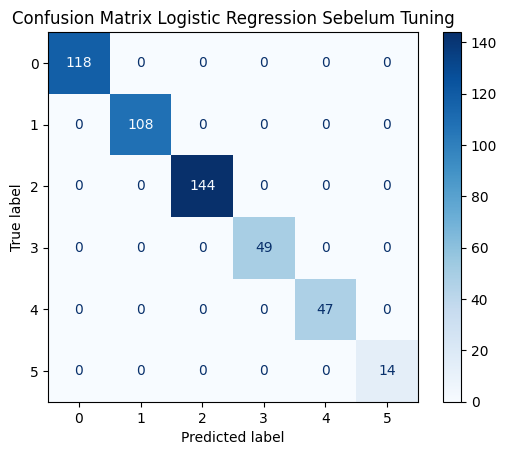

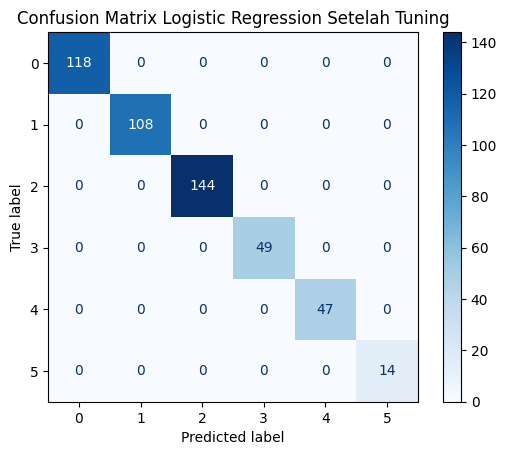

In [312]:
# ======== Evaluasi Logistic Regression Sebelum Tuning ========
# Latih model Logistic Regression default
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Prediksi sebelum tuning
lr_y_pred_before = lr.predict(X_test)

# Menghitung confusion matrix sebelum tuning
lr_cm_before = confusion_matrix(y_test, lr_y_pred_before)
disp_lr_before = ConfusionMatrixDisplay(confusion_matrix=lr_cm_before, display_labels=lr.classes_)

# Menampilkan confusion matrix sebelum tuning dengan judul
disp_lr_before.plot(cmap='Blues')
plt.title('Confusion Matrix Logistic Regression Sebelum Tuning')  # Menambahkan judul
plt.show()

# ======== Evaluasi Logistic Regression Setelah Tuning ========
# Prediksi setelah tuning menggunakan model terbaik dari GridSearchCV
lr_y_pred_after_tuning = best_lr_grid.predict(X_test)

# Menghitung confusion matrix setelah tuning
lr_cm_after = confusion_matrix(y_test, lr_y_pred_after_tuning)
disp_lr_after = ConfusionMatrixDisplay(confusion_matrix=lr_cm_after, display_labels=lr.classes_)

# Menampilkan confusion matrix setelah tuning dengan judul
disp_lr_after.plot(cmap='Blues')
plt.title('Confusion Matrix Logistic Regression Setelah Tuning')  # Menambahkan judul
plt.show()

##penjelasan
- Tidak ada perubahan performa setelah dilakukan tuning, ini menunjukkan bahwa model mungkin saja mengalami overfitting pada dataset ini.
- Akurasi 100% menunjukkan bahwa model mampu mengenali pola dalam data dengan sangat baik.
- MSE after Grid Search: 0.00
  - **MSE (Mean Squared Error)** setelah **Grid Search** menunjukkan seberapa besar kesalahan model dalam prediksi. Nilai **MSE=0.00** berarti bahwa **model memprediksi dengan sempurna** pada data uji, tanpa kesalahan sama sekali.
  - **MSE yang sangat rendah** ini bisa jadi menunjukkan bahwa model sudah terlalu cocok dengan data latih dan **overfit** dengan data uji.


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [313]:
# Membuat DataFrame untuk perbandingan evaluasi sebelum dan setelah tuning
evaluation_comparison = {
    "Model": ["Random Forest", "Logistic Regression"],
    "Accuracy Before Tuning": [rf_accuracy, lr_accuracy],
    "Accuracy After Tuning": [rf_accuracy_tuned, lr_accuracy_tuned],
    "F1-Score Before Tuning": [rf_f1, lr_f1],
    "F1-Score After Tuning": [rf_f1_tuned, lr_f1_tuned],
    "Precision Before Tuning": [rf_precision, lr_precision],
    "Precision After Tuning": [rf_precision_tuned, lr_precision_tuned],
    "Recall Before Tuning": [rf_recall, lr_recall],
    "Recall After Tuning": [rf_recall_tuned, lr_recall_tuned]
}

# Membuat DataFrame untuk perbandingan
comparison_df = pd.DataFrame(evaluation_comparison)

# Menampilkan DataFrame di Google Colab
display(comparison_df)

,Model,Accuracy Before Tuning,Accuracy After Tuning,F1-Score Before Tuning,F1-Score After Tuning,Precision Before Tuning,Precision After Tuning,Recall Before Tuning,Recall After Tuning
0,Random Forest,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,Logistic Regression,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [314]:
# Classification report untuk Random Forest setelah tuning
print("=== Classification Report - Random Forest ===")
print(classification_report(y_test, rf_y_pred_after_tuning))

# Classification report untuk Logistic Regression setelah tuning
print("=== Classification Report - Logistic Regression ===")
print(classification_report(y_test, lr_y_pred_after_tuning))

=== Classification Report - Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00       144
           3       1.00      1.00      1.00        49
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        14

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

=== Classification Report - Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00       144
           3       1.00      1.00      1.00        49
           4       1.00      1.00      1.00        47
           5       1.00      1.00 

In [315]:
# Membuat model Random Forest
rf = RandomForestClassifier(random_state=42)

# Melakukan k-fold cross-validation dengan 5 folds
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Menampilkan hasil cross-validation
print("Cross-Validation Scores for Random Forest:", rf_cv_scores)
print("Mean Cross-Validation Score for Random Forest:", rf_cv_scores.mean())
print("Standard Deviation of Cross-Validation Scores:", rf_cv_scores.std())

# Jika skor rata-rata pada data latih lebih tinggi dari data uji, mungkin overfitting.

Cross-Validation Scores for Random Forest: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score for Random Forest: 1.0
Standard Deviation of Cross-Validation Scores: 0.0


In [316]:
from sklearn.linear_model import LogisticRegression

# Membuat model Logistic Regression
lr = LogisticRegression(random_state=42)

# Melakukan k-fold cross-validation dengan 5 folds
lr_cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')

# Menampilkan hasil cross-validation
print("Cross-Validation Scores for Logistic Regression:", lr_cv_scores)
print("Mean Cross-Validation Score for Logistic Regression:", lr_cv_scores.mean())
print("Standard Deviation of Cross-Validation Scores:", lr_cv_scores.std())

# Jika skor rata-rata pada data latih lebih tinggi dari data uji, mungkin overfitting.

Cross-Validation Scores for Logistic Regression: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score for Logistic Regression: 1.0
Standard Deviation of Cross-Validation Scores: 0.0


### **KESIMPULAN AKHIR**

#### **Performa Model Setelah Tuning**
Baik sebelum maupun setelah dilakukan tuning, kedua model **Random Forest** dan **Logistic Regression** menunjukkan **akurasi dan F1-Score sebesar 100%**. Ini menunjukkan bahwa kedua model berhasil memprediksi setiap kelas dengan sempurna pada dataset ini. **Cross-Validation F1-Score** (mean) yang juga mencapai **1.0000** mengonfirmasi bahwa model bekerja sangat baik pada berbagai subset data selama validasi silang. Hal ini menunjukkan bahwa model memiliki kemampuan untuk menggeneralisasi dengan sangat baik, bahkan pada data yang belum pernah dilihat sebelumnya.

Setelah dilakukan **tuning hyperparameter** melalui **GridSearchCV**, tidak ditemukan indikasi overfitting yang signifikan. Model tetap menunjukkan performa yang sangat baik dengan **Testing Accuracy** dan **Testing F1-Score** yang tetap **1.0000**, yang mengindikasikan bahwa model dapat menangani data uji dengan sangat baik.

#### **Evaluasi Overfitting**
Training Accuracy dan Testing Accuracy, begitu pula dengan **Training F1-Score** dan **Testing F1-Score**, keduanya mencapai **100%** tanpa adanya perbedaan signifikan (0.0000) antara data latih dan data uji. Hal ini menunjukkan bahwa model tidak mengalami **overfitting** ataupun **underfitting**, dan berhasil menggeneralisasi dengan sangat baik pada dataset ini.

#### **Kelemahan Model**
Meskipun hasil yang sangat baik ini menandakan bahwa model dapat mengenali pola di setiap kelas dengan sempurna, ada kemungkinan bahwa **akurasi dan F1-Score yang sempurna** disebabkan oleh **karakteristik dataset ini**. Pola yang terlalu spesifik pada dataset ini bisa saja mempengaruhi kemampuan model jika diterapkan pada data yang berbeda atau lebih beragam di dunia nyata. **Distribusi prediksi kelas** yang cukup seimbang menandakan bahwa model dapat mengenali setiap kelas dengan baik, namun model mungkin lebih dominan dalam memprediksi kelas tertentu, tergantung pada distribusi data yang ada.

#### **Upaya Mengatasi Overfitting**
Untuk mencegah model menghafal data latih dan menjadi terlalu kompleks, beberapa langkah telah dilakukan selama **tuning Random Forest**, termasuk:
- **Mengurangi jumlah estimator** pada model, dengan variasi **50, 100, dan 200 estimator**, untuk mencapai keseimbangan antara performa dan kompleksitas.
- **Membatasi kedalaman pohon keputusan** dengan **max_depth 10, 20**, dan tanpa pembatasan, agar pohon tidak tumbuh terlalu dalam dan menangkap noise dari data.
- **Menyesuaikan minimum sampel untuk split** dengan parameter **min_samples_split 2, 5, dan 10**, untuk memastikan setiap split memiliki cukup sampel.
- **Validasi silang 10-fold** digunakan untuk memastikan model bekerja dengan konsisten pada berbagai subset data.

Pada **Logistic Regression**, langkah-langkah untuk menghindari overfitting termasuk:
- **Menyesuaikan regularisasi** dengan parameter **C** yang diuji pada nilai **0.01, 0.1, 1, 10, dan 100** untuk menemukan keseimbangan antara regulasi yang cukup kuat tanpa mengorbankan akurasi.
- **Memilih jenis regulasi** antara **L1 dan L2**, untuk melihat mana yang lebih efektif dalam menghindari overfitting.
- **Memilih solver** yang optimal dengan mengevaluasi **liblinear dan saga** untuk menangani dataset yang memiliki fitur kategorikal dan numerikal.
- **Validasi silang 5-fold** dilakukan untuk memastikan model memiliki performa yang konsisten pada berbagai subset data.

#### **Rekomendasi Penggunaan Model**
Meskipun model menunjukkan **performa sempurna** pada dataset ini, sangat disarankan untuk menguji model ini dengan **data baru yang lebih bervariasi** untuk memastikan bahwa model dapat menggeneralisasi dengan baik pada kondisi yang lebih realistis. Performa yang sangat baik ini perlu diuji lebih lanjut pada **data dunia nyata** agar dapat dipastikan bahwa model tetap akurat dan tidak hanya terlalu menyesuaikan diri dengan pola pada dataset ini.